In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os

In [2]:
current_dir = os.getcwd()

# current_dir = os.path.dirname(os.path.abspath(__file__))
csv_path = os.path.join(current_dir, "..", "Data", "holland_data.csv")
csv_path = os.path.abspath(csv_path)

In [3]:
data_raw=pd.read_csv(csv_path,delimiter='\t')
data_raw.info

C:\Users\usEr\AppData\Local\Temp\ipykernel_39644\485099286.py:1: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw=pd.read_csv(csv_path,delimiter='\t')


<bound method DataFrame.info of         R1  R2  R3  R4  R5  R6  R7  R8  I1  I2  ...  orientation  race  voted  \
0        3   4   3   1   1   4   1   3   5   5  ...            1     1      2   
1        1   1   2   4   1   2   2   1   5   5  ...            3     4      1   
2        2   1   1   1   1   1   1   1   4   1  ...            1     4      2   
3        3   1   1   2   2   2   2   2   4   1  ...            1     1      2   
4        4   1   1   2   1   1   1   2   5   5  ...            3     1      2   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...          ...   ...    ...   
145823   2   1   1   1   1   1   1   2   2   3  ...            2     4      2   
145824   1   1   1   1   1   1   1   4   4   1  ...            1     3      1   
145825   1   1   1   1   1   1   1   1   1   1  ...            4     4      2   
145826   3   4   4   5   2   4   4   3   3   4  ...            5     5      1   
145827   2   4   1   4   2   3   1   4   4   4  ...            1     4      1

In [4]:
data = data_raw.copy()
pd.options.display.max_columns = 150
data.drop(data.columns[48:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()

Number of participants:  145828


,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8
0,3,4,3,1,1,4,1,3,5,5,4,3,4,5,4,3,5,4,1,2,4,5,2,4,3,5,5,4,5,5,5,5,2,1,4,1,2,2,1,3,1,3,1,1,1,3,1,1
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1
2,2,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,2,1,1,3,1,3,1,5,3,5,5,4,4,1,3,3,5,1,4,4,3,1,3,2,2,1,2,4,1
3,3,1,1,2,2,2,2,2,4,1,2,4,3,2,3,2,5,2,4,5,1,4,4,2,4,2,3,3,2,1,3,2,5,4,3,2,3,3,2,3,3,2,3,3,2,2,2,2
4,4,1,1,2,1,1,1,2,5,5,5,3,5,5,5,3,3,5,5,5,5,5,1,5,5,4,4,4,5,5,5,5,2,3,2,3,2,4,2,2,4,2,2,4,5,5,2,2


In [5]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib


df = data
columns = list(df.columns)

scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
# This (scaler ) is created just for sake of ease of calculation for clustering 
df = df.dropna(axis=0)
df_sample = df

In [6]:
root_dir = os.path.abspath(os.path.join(current_dir, "..","artifacts"))
joblib.dump(scaler, os.path.join(root_dir, 'holland_scaler.pkl'))

['c:\\Users\\usEr\\Documents\\GitHub\\Career-path-guidance-web-application\\ML\\artifacts\\holland_scaler.pkl']

In [7]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

n_label = 6
result = []
n_runs = 100

traits = {
    'Realistic': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'],
    'Investigative': ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8'],
    'Artistic': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'],
    'Social': ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'],
    'Enterprising': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
    'Conventional' : ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
}

for run in range(n_runs):
    kmeans = KMeans(n_clusters=n_label)
    k_fit = kmeans.fit(df_sample)

    # Predicting the Clusters
    pd.options.display.max_columns = 10

    #labels_ is used to identify Labels of each point
    predictions = k_fit.labels_
    df_sample['Clusters'] = predictions
    # df_sample.head(10)

    # คำนวณค่าเฉลี่ยในแต่ละกลุ่ม
    cluster_trait_means = {}
    for trait, columns in traits.items():
        cluster_trait_means[trait] = df_sample[columns].mean(axis=1).groupby(df_sample['Clusters']).mean()





In [8]:
value_counts = df_sample['Clusters'].value_counts()
print(value_counts)

Clusters
0    39933
5    34403
1    27469
4    20169
3    13866
2     9988
Name: count, dtype: int64


In [9]:
current_dir = os.getcwd()
csv_dir = os.path.abspath(os.path.join(current_dir, "..", "Data"))  # Path to folder
csv_path = os.path.join(csv_dir, "label_data_holland.csv")          # Full path with filename

df_sample.to_csv(csv_path, index=False)
print("Saved CSV to:", csv_path)

Saved CSV to: c:\Users\usEr\Documents\GitHub\Career-path-guidance-web-application\ML\Data\label_data_holland.csv


In [ ]:
# สร้าง DataFrame แสดงค่าเฉลี่ย
cluster_means = pd.DataFrame(cluster_trait_means)

cluster_means.index = range(n_label)

# Convert the DataFrame to a numpy array
array = cluster_means.values.T  # Transpose to have clusters as columns and traits as rows

result.append(array)
# print(cluster_means)

In [7]:
df_sample

,R1,R2,R3,R4,R5,...,C5,C6,C7,C8,Clusters
0,0.324008,1.532648,1.116332,-0.966015,-0.699464,...,-1.102271,0.288300,-0.956633,-1.001810,1
1,-1.193048,-0.896090,0.224167,1.274210,-0.699464,...,-1.102271,-0.473900,-0.956633,-1.001810,1
2,-0.434520,-0.896090,-0.667998,-0.966015,-0.699464,...,-1.102271,-0.473900,1.449878,-1.001810,5
3,0.324008,-0.896090,-0.667998,-0.219274,0.233223,...,-0.373051,-0.473900,-0.154462,-0.201038,5
4,1.082536,-0.896090,-0.667998,-0.219274,-0.699464,...,1.814609,1.812699,-0.154462,-0.201038,1
...,...,...,...,...,...,...,...,...,...,...,...
145823,-0.434520,-0.896090,-0.667998,-0.966015,-0.699464,...,0.356169,-0.473900,-0.956633,-1.001810,0
145824,-1.193048,-0.896090,-0.667998,-0.966015,-0.699464,...,-1.102271,1.050499,0.647708,-1.001810,0
145825,-1.193048,-0.896090,-0.667998,-0.966015,-0.699464,...,0.356169,-0.473900,0.647708,0.599733,4
145826,0.324008,1.532648,2.008497,2.020952,0.233223,...,1.814609,1.050499,-0.956633,-1.001810,3


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import seaborn as sns
import pickle

In [9]:
X = df_sample
y = df_sample['Clusters']

In [10]:
def train_model(model,param,X_train, X_test, y_train, y_test,model_name):

    # Apply GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, n_jobs=-1, verbose=2)

    # Fit the model to training data
    grid_search.fit(X_train, y_train)
    
    # Print best parameters from GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)

    # Evaluate the model with best parameters
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred_test = best_model.predict(X_test)

    # Print classification report and accuracy
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average="weighted")
    recall = recall_score(y_test, y_pred_test, average="weighted")
    f1 = f1_score(y_test, y_pred_test, average="weighted")
    cm = confusion_matrix(y_test, y_pred_test)
    print("==============================")
    print(f"         {model_name}         ")
    print("==============================")
    print("Accuracy:  {:.2f}%".format(accuracy * 100))
    print("Precision:  {:.2f}%".format(precision * 100))
    print("Recall:  {:.2f}%".format(recall * 100))
    print("F1 Score:  {:.2f}%".format(f1 * 100))


    labels = sorted(y_test.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig,ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='viridis', ax=ax)
    ax.grid(False)
    plt.show()

    return best_model

X = df_sample.drop('Clusters', axis=1)
y = df_sample['Clusters'] 


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
         XGBoost         
Accuracy:  91.54%
Precision:  91.56%
Recall:  91.54%
F1 Score:  91.54%


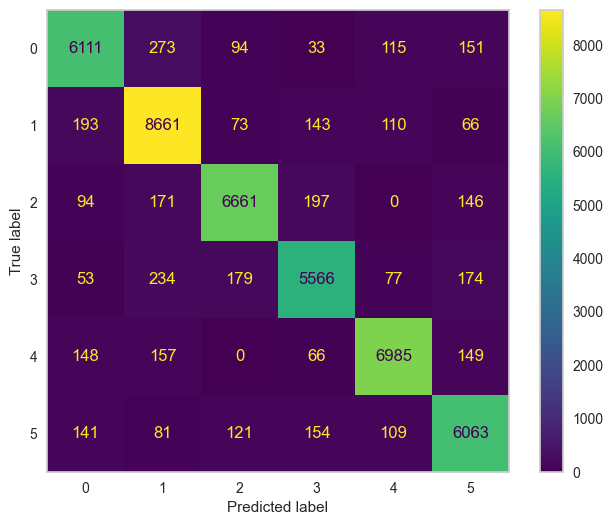

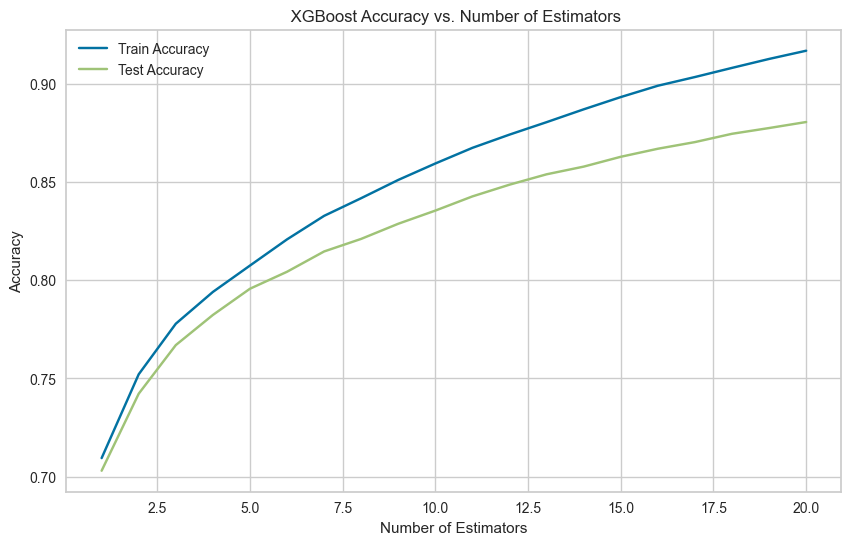

In [11]:
import xgboost as xgb

# Create BGBoost model
xgb_model = xgb.XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100],  # Number of trees to build
    'learning_rate': [ 0.1],  # Step size shrinkage used in updates
    'max_depth': [None],  # Maximum depth of a tree
    'min_child_weight': [1],  # Minimum sum of weights of all observations needed in a child
    'subsample': [1],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [1.0],  # Fraction of features used for tree building
}

XGBoost = train_model(xgb_model,param_grid_xgb,X_train, X_test, y_train, y_test,'XGBoost')

train_accuracies_xgb = []
test_accuracies_xgb = []
n_estimators_list = range(1,21)

for n in n_estimators_list:
    x_xgb =  xgb.XGBClassifier(n_estimators=n, random_state=42)
    x_xgb.fit(X_train, y_train)
    train_accuracies_xgb.append(accuracy_score(y_train, x_xgb.predict(X_train)))
    test_accuracies_xgb.append(accuracy_score(y_test, x_xgb.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_accuracies_xgb, label="Train Accuracy")
plt.plot(n_estimators_list, test_accuracies_xgb, label="Test Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title(" XGBoost"+" Accuracy vs. Number of Estimators")
plt.legend()
plt.show()


In [12]:

with open('xgb_model_holland.pkl', 'wb') as xgboost_holland:
    pickle.dump(XGBoost, xgboost_holland)